In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from os import path

In [3]:
data_dir = path.join('..', 'data')
img_dir = path.join(data_dir, 'img')

dataset_file = 'reddit_wsb.csv'

In [5]:
data = pd.read_csv(path.join(data_dir, dataset_file))
data = data.sort_values(by=['timestamp'])
data

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
...,...,...,...,...,...,...,...,...
37150,Could use some help here at the end of the day...,109,lt4i4u,https://i.redd.it/1rhnimof9vj61.jpg,37,1.614393e+09,NaN,2021-02-27 04:37:32
37151,The war has just begun,486,lt4fk0,https://v.redd.it/fcyia2xo8vj61,30,1.614393e+09,NaN,2021-02-27 04:34:21
37152,PSA: AMCX is not up because of AMC,33,lt4ci5,https://www.reddit.com/r/wallstreetbets/commen...,17,1.614393e+09,Tl;dr AMCX is a very undervalued company based...,2021-02-27 04:30:42
37153,Ape Combat 6: Liberation of Gamestopmeria,32,lt46qn,https://v.redd.it/x6b005am5vj61,3,1.614393e+09,NaN,2021-02-27 04:23:42


# Encoding time attributes

In [42]:
def encode_time(timestamps):
    str_time = [x.split()[1] for x in timestamps]

    splited_time = [x.split(':') for x in str_time]
    float_time = [float(x[0] + '.' + x[1]) for x in splited_time]

    sin_time = [np.sin(2 * np.pi * x / 23.59) for x in float_time]
    cos_time = [np.cos(2 * np.pi * x / 23.59) for x in float_time]
    
    return sin_time, cos_time

In [43]:
sin_time, cos_time = encode_time(data.timestamp.values)
data['sin_time'] = sin_time
data['cos_time'] = cos_time

data

,title,score,id,url,comms_num,created,body,timestamp,sin_time,cos_time
32591,$CBAT $SUNW $SPI $OXBR Y'all are missing the p...,4,j1fmmo,https://www.reddit.com/r/wallstreetbets/commen...,11,1.601340e+09,$CBAT is going to be a great play further yet:...,2020-09-29 03:46:56,0.796551,0.604571
257,An autists journey. $150 to $68k in one month....,50,l6h58v,https://www.reddit.com/gallery/l6h58v,8,1.611818e+09,NaN,2021-01-28 09:08:16,0.661741,-0.749732
256,You all have made Melvin live up to its name,70,l6h59b,https://i.redd.it/59sk10r7iyd61.png,7,1.611818e+09,NaN,2021-01-28 09:08:17,0.661741,-0.749732
255,I got in late on GME but I believe in the caus...,75,l6h5a2,https://www.reddit.com/r/wallstreetbets/commen...,14,1.611818e+09,You guys are amazing. Thank you for sending GM...,2021-01-28 09:08:18,0.661741,-0.749732
254,Highest SI % of Float End of Business Jan 27th...,26,l6h5am,https://www.reddit.com/r/wallstreetbets/commen...,22,1.611818e+09,Will Update Daily At Market Close\n\nTop 5 sec...,2021-01-28 09:08:19,0.661741,-0.749732
...,...,...,...,...,...,...,...,...,...,...
36366,Absolute Hidden GEM $DVN.CN.... 💎💎💎,4,lvvwsj,https://www.reddit.com/r/wallstreetbets/commen...,14,1.614696e+09,Some further DD on this absolute hidden gem $D...,2021-03-02 16:46:07,-0.946600,-0.322411
36365,30k in F calls expiring Friday. The new DFV is...,3,lvvzzw,https://i.redd.it/b5m4oe1abkk61.png,1,1.614697e+09,NaN,2021-03-02 16:52:25,-0.951631,-0.307243
36364,What did one cunt say to the other cunt?,0,lvw227,https://www.reddit.com/r/wallstreetbets/commen...,0,1.614697e+09,So I’ve been pretty much a student to this WSB...,2021-03-02 16:56:18,-0.954850,-0.297087
36363,Can I use my 401k from Charles Schwab to inves...,1,lvw27y,https://www.reddit.com/r/wallstreetbets/commen...,0,1.614697e+09,Would I have to pull it out or choose an optio...,2021-03-02 16:56:35,-0.954850,-0.297087


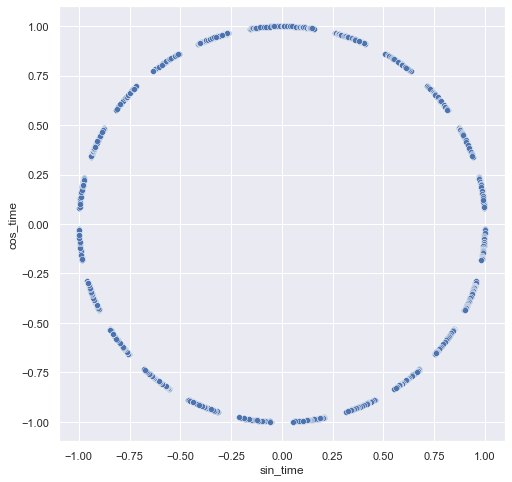

In [44]:
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(data=data, x='sin_time', y='cos_time')

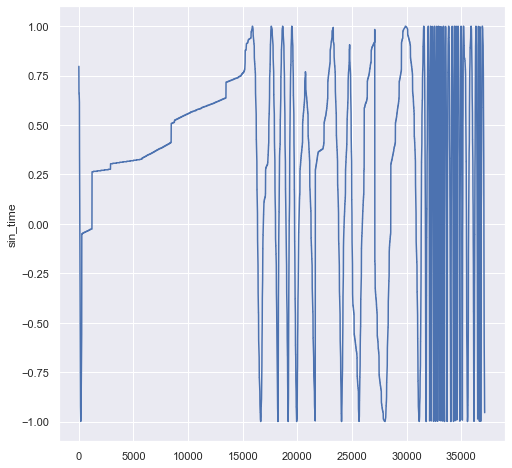

In [45]:
sns.lineplot(data=data, x=range(0, data.shape[0]), y='sin_time')